# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
#!pip install plotnine

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
#function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [41]:
#function to plot results for each K
def res_k(data,start,end):
    list_num_clusters = list(range(start,end))
    for num_clusters in list_num_clusters:
        km = KMeans(n_clusters=num_clusters)
        c= km.fit(data)
        u_labels = np.unique(km.labels_)
        for i in u_labels:
            plt.scatter(data[km.labels_ == i , 0] , data[km.labels_ == i , 1] , label = i)
        plt.legend()
        plt.show()

In [94]:
#function for elbow method
def elbow(data,start,end):
    inertia = []
    list_num_clusters = list(range(start,end))
    for num_clusters in list_num_clusters:
        km = KMeans(n_clusters=num_clusters)
        c= km.fit(data)
        inertia.append(km.inertia_)
    plt.plot(list_num_clusters,inertia)
    plt.scatter(list_num_clusters,inertia)
    plt.xlabel('K')
    plt.ylabel('Inertia');


In [93]:
#function to plot silhouette score vs k
def silhouette_vs_k(data,start,end):
    silhouette_scores = []
    list_num_clusters = list(range(start,end))
    for num_clusters in list_num_clusters:
        km = KMeans(n_clusters=num_clusters)
        c= km.fit(data)
        silhouette_scores.append(silhouette_score(data,km.labels_,metric='euclidean'))
    
    plt.plot(list_num_clusters,silhouette_scores)
    plt.scatter(list_num_clusters,silhouette_scores)
    plt.xlabel('K')
    plt.ylabel('Silhouette Score');
    k_means_silhouette=max(silhouette_scores)
    K=silhouette_scores.index(k_means_silhouette)+2 # best K
    print("The best silhouette score is "+str(k_means_silhouette)+" for "+str(K)+" clusters.")

In [237]:
#function for hierarchical clustering 
def agg(data,clusters,distance,linkage):
    model = AgglomerativeClustering(n_clusters=clusters, affinity=distance, linkage=linkage)
    model = model.fit(data)
    silhouette=silhouette_score(data,model.labels_,metric='euclidean')
    #u_labels = np.unique(model.labels_)
    #for i in u_labels:
     #   plt.scatter(data[model.labels_ == i , 0] , data[model.labels_ == i , 1] , label = i)
    #plt.legend()
    #plt.show()
    return silhouette

In [ ]:
#function to plot dendrograms 


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



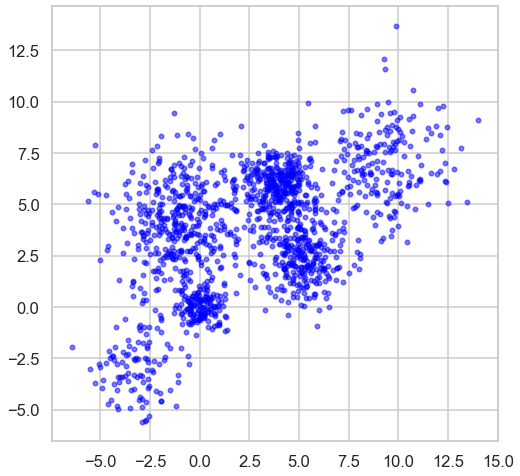

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

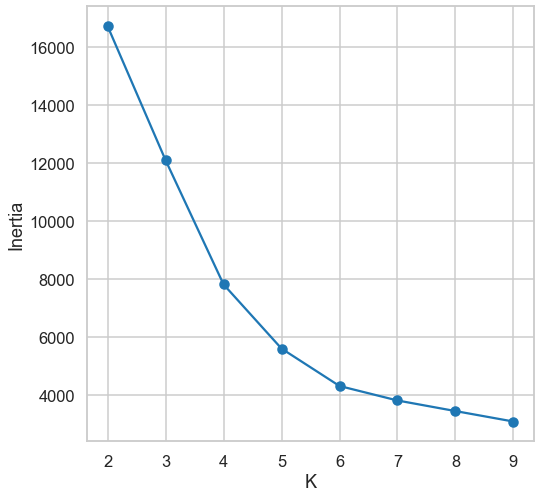

In [37]:
#Elbow Method
elbow(Multi_blob_Data,2,10)

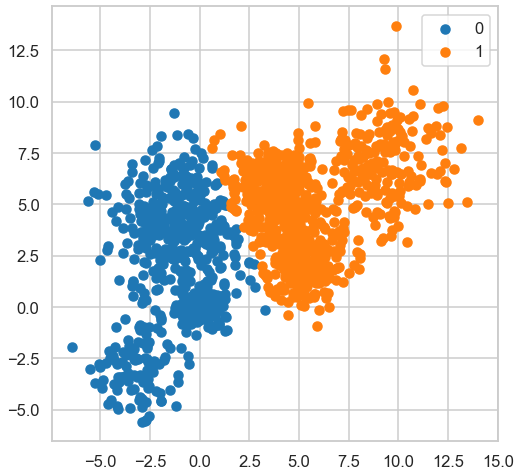

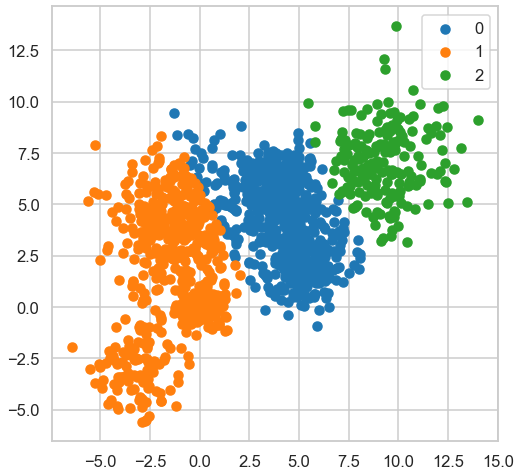

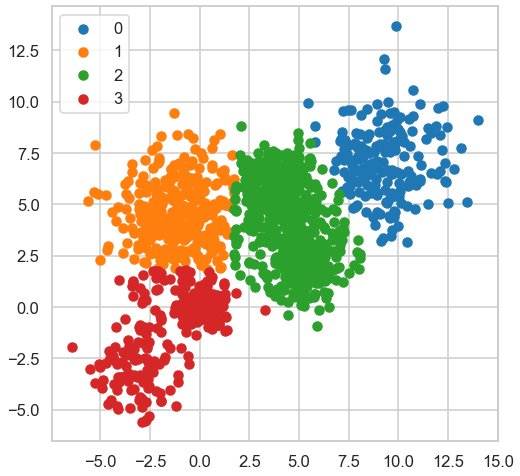

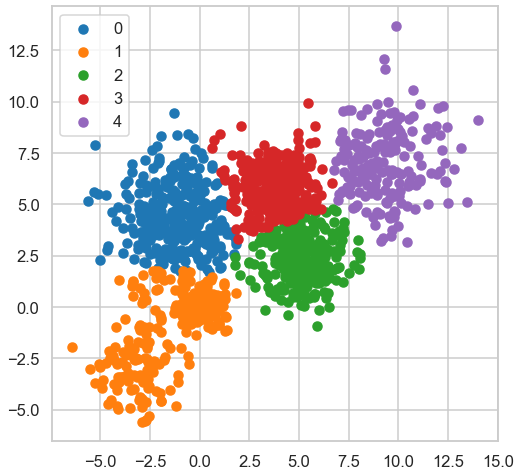

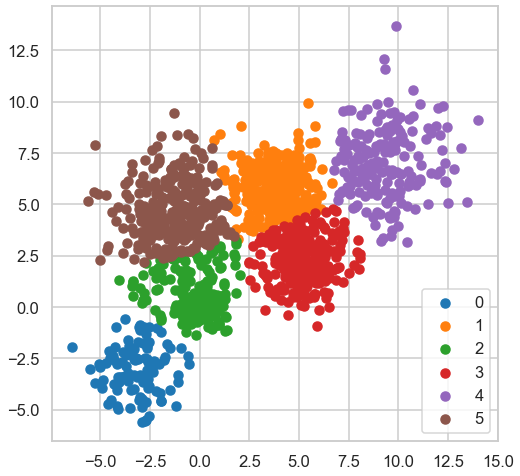

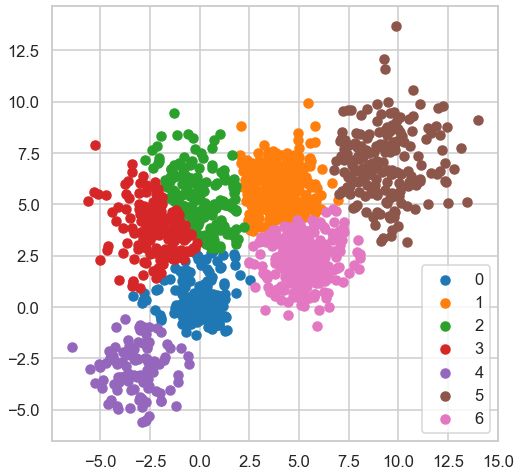

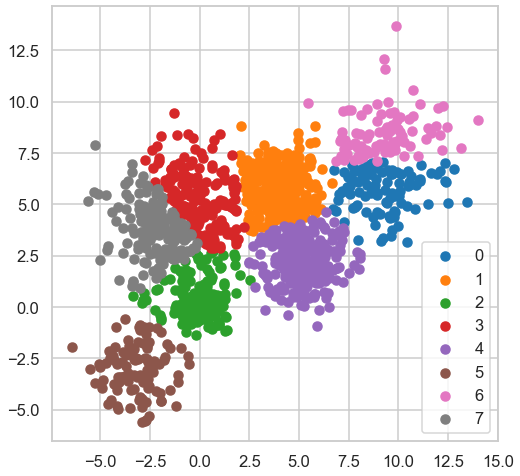

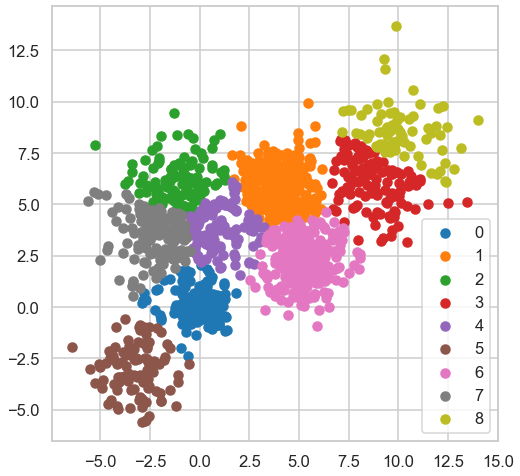

In [42]:
 res_k(Multi_blob_Data,2,10)

The best silhouette score is 0.4862240839323367 for 6 clusters.


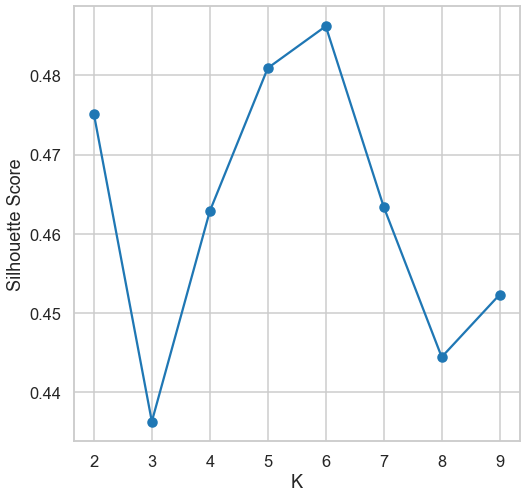

In [51]:
silhouette_vs_k(Multi_blob_Data,2,10)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

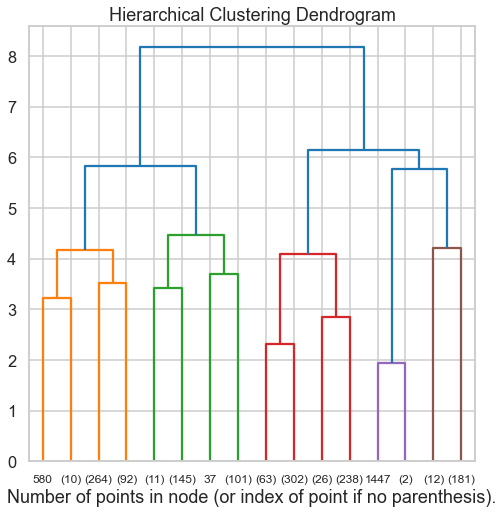

In [182]:
#euclidean average
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

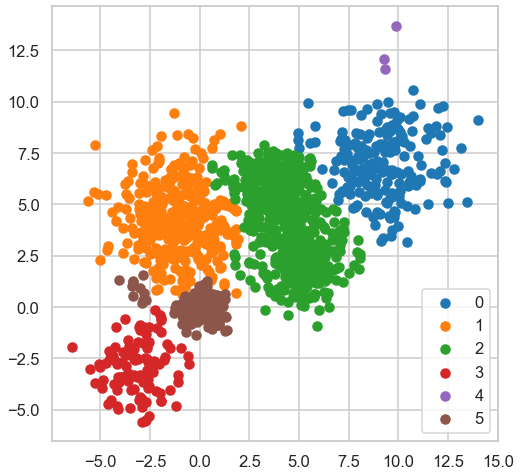

0.41478815574933364

In [185]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_e_a=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_e_a

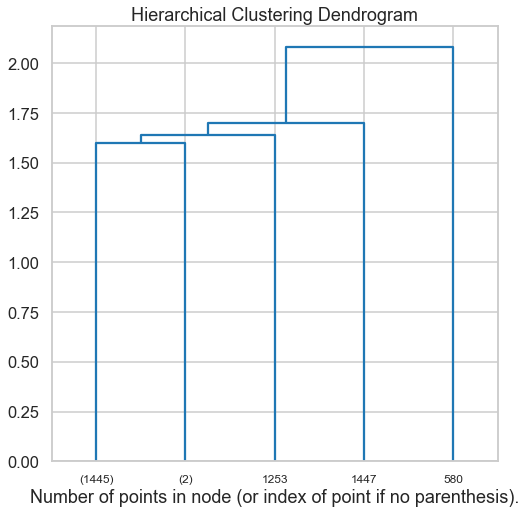

In [10]:
#euclidean single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

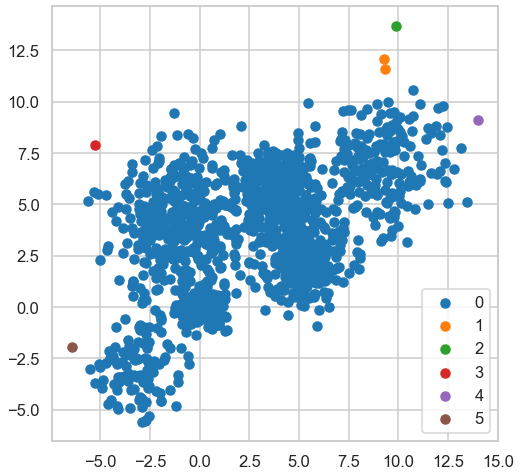

0.08705564851389591

In [187]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_e_s=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_e_s

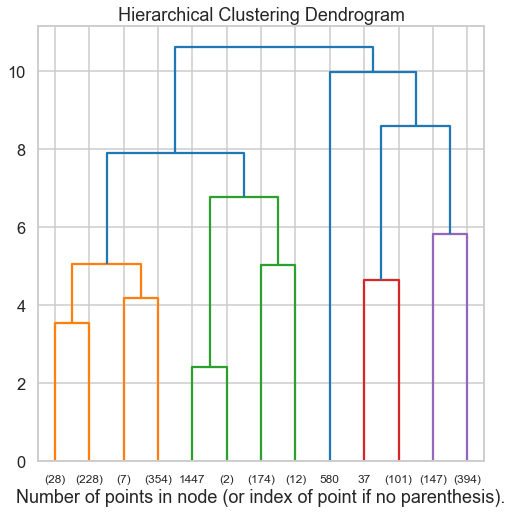

In [11]:
#manhattan average
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='average')

model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

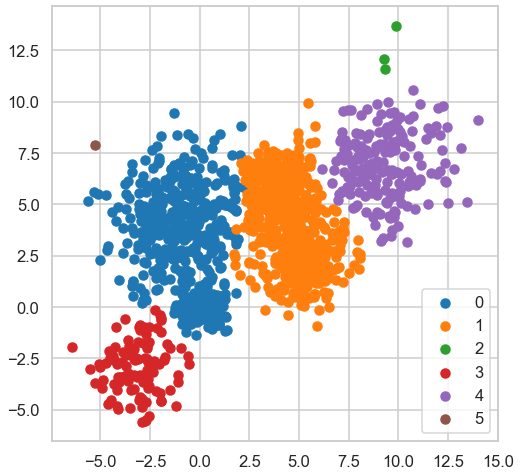

0.38029768112070367

In [188]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_m_a=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_m_a

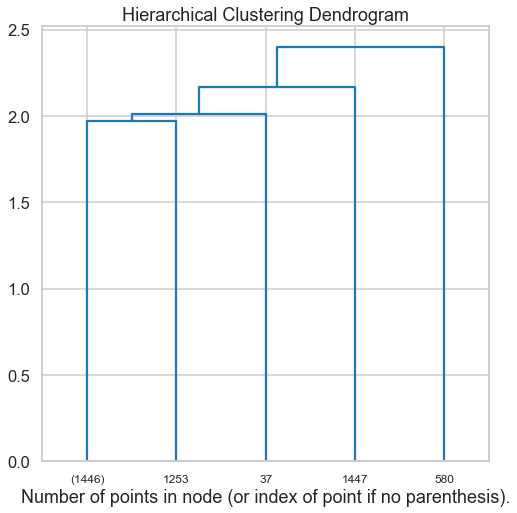

In [12]:
#manhattan single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='single')

model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

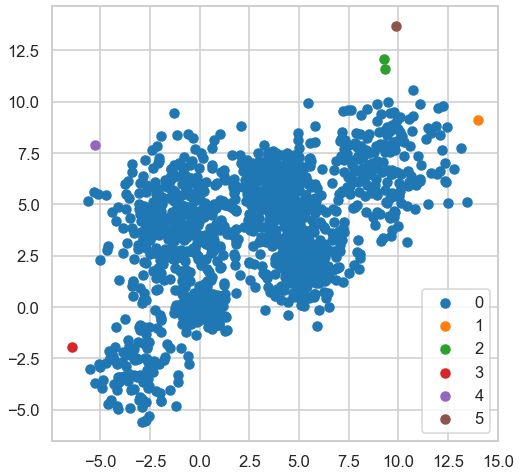

0.08705564851389591

In [189]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_m_s=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_m_s

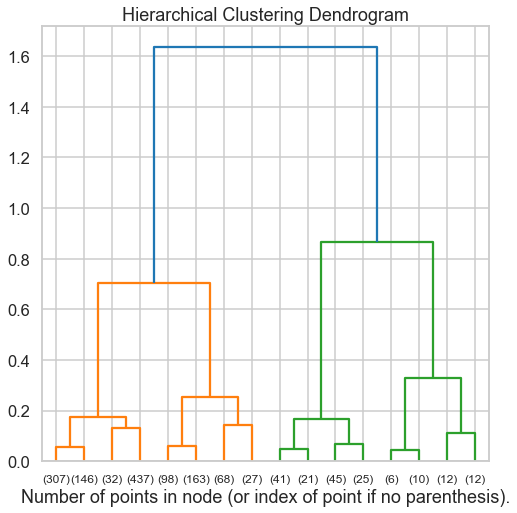

In [13]:
#cosine average
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average')

model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

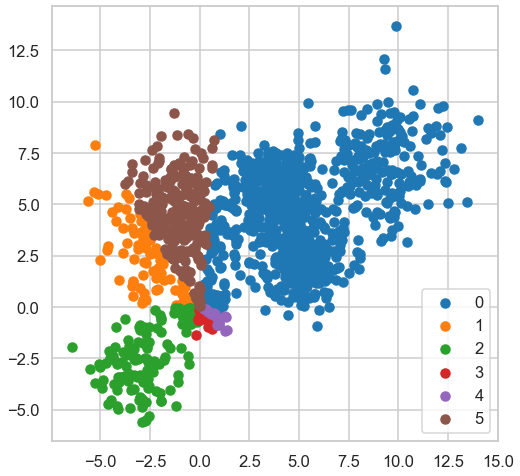

0.2035575393889621

In [190]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_c_a=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_c_a

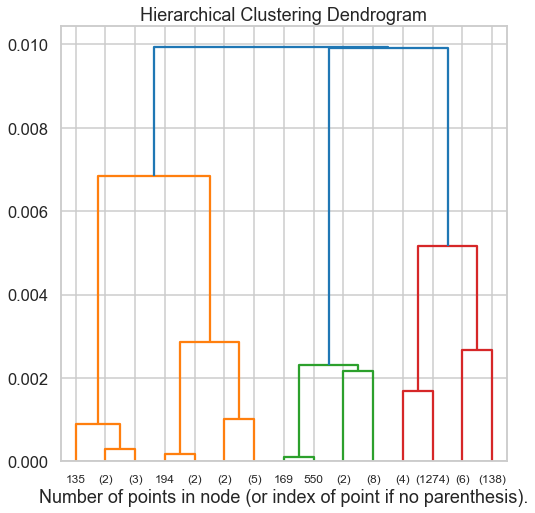

In [191]:
#cosine single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='single')

model = model.fit(Multi_blob_Data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

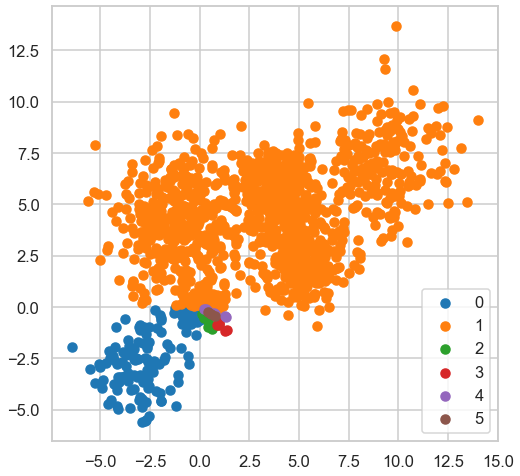

0.07162243486315635

In [192]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model = model.fit(Multi_blob_Data)
list_num_clusters = list(range(2,10))
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
silhouette_c_s=silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
silhouette_c_s

In [ ]:
#Best silhouette score --> euclidean average

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

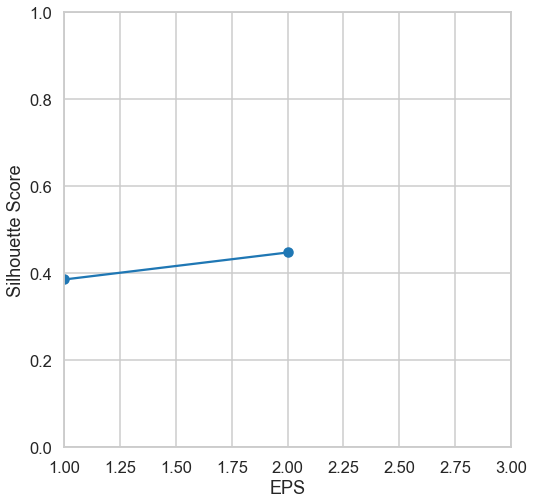

In [179]:
silhouette_scores_1= []
eps_1=[]
for eps_db in np.arange(1,3):
        clusters = DBSCAN(eps=eps_db).fit(Multi_blob_Data)
        silhouette_scores_1.append(silhouette_score(Multi_blob_Data,clusters.labels_,metric='euclidean'))
        eps_1.append(eps_db)
plt.xlim(1, 3)
plt.ylim(0, 1)
plt.plot(eps_1,silhouette_scores_1)
plt.scatter(eps_1,silhouette_scores_1)
plt.xlabel('EPS')
plt.ylabel('Silhouette Score');

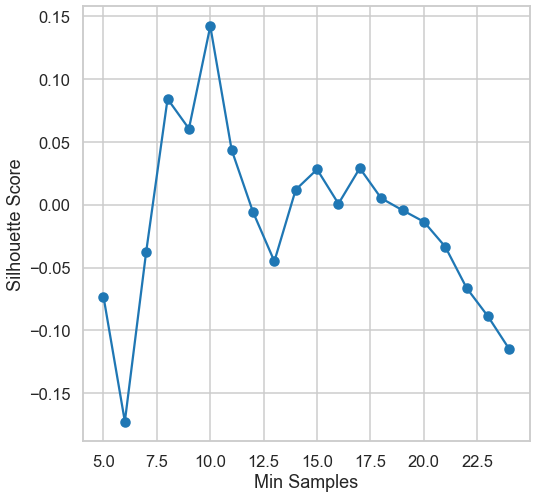

In [154]:
silhouette_scores_2= []
min_samples_1=[]
for min_samples_db in range(5,25,1):
        clusters = DBSCAN(min_samples=min_samples_db).fit(Multi_blob_Data)
        silhouette_scores_2.append(silhouette_score(Multi_blob_Data,clusters.labels_,metric='euclidean'))
        #silhouette_scores.append(silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean'))
        min_samples_1.append(min_samples_db)
plt.plot(min_samples_1,silhouette_scores_2)
plt.scatter(min_samples_1,silhouette_scores_2)
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score');

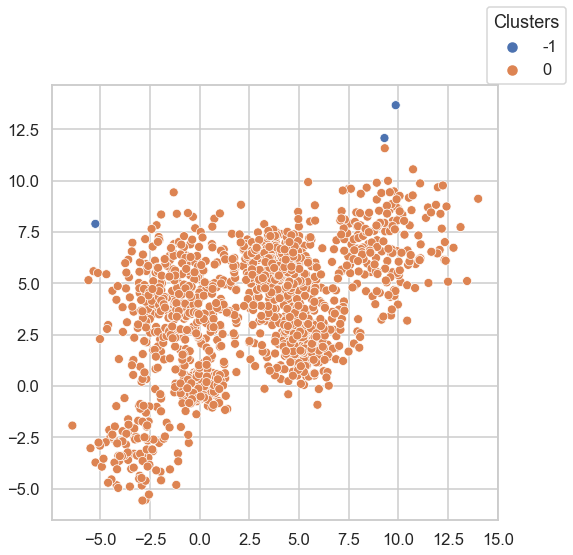

0.43762353642223145

In [177]:
clusters = DBSCAN(eps=2, min_samples=10).fit(Multi_blob_Data)
p = sns.scatterplot(data=Multi_blob_Data, x=Multi_blob_Data[:,0], y=Multi_blob_Data[:,1], hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()
score = silhouette_score(Multi_blob_Data, clusters.labels_)
score

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [69]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [193]:
#Elbow Method
#elbow(iris_data,2,10)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [95]:
df=pd.read_csv('Customer data.csv')

In [96]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# K Means

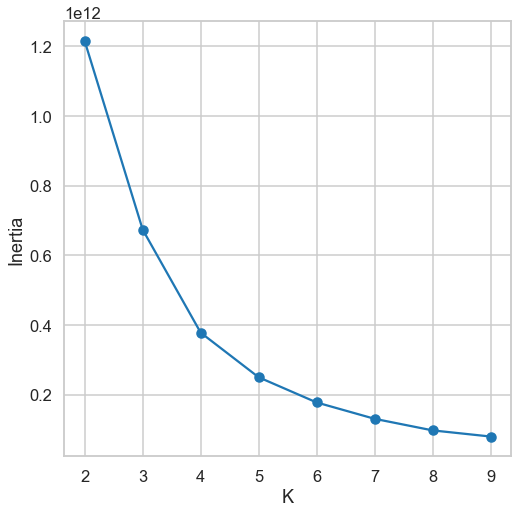

In [97]:
#Elbow Method
elbow(df,2,10)

The best silhouette score is 0.5828454744042287 for 2 clusters.


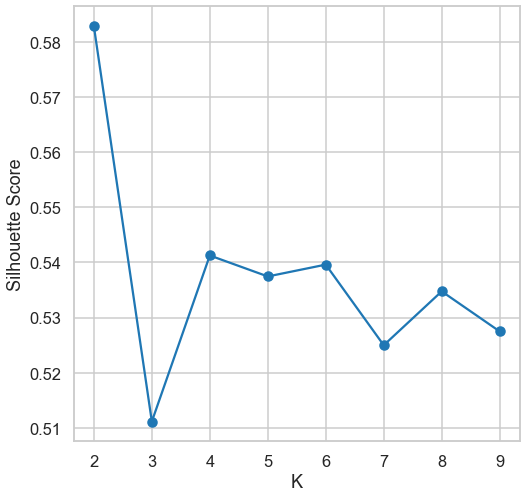

In [98]:
silhouette_vs_k(df,2,10)

In [ ]:
km = KMeans(n_clusters=2)
c= km.fit_predict(df)

# Hierarchical

In [ ]:
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()

In [239]:
silhouette_h=[]
silhouette_h.append(agg(df,2,'euclidean','average'))
silhouette_h.append(agg(df,2,'euclidean','single'))
silhouette_h.append(agg(df,2,'manhattan','average'))
silhouette_h.append(agg(df,2,'manhattan','single'))
silhouette_h.append(agg(df,2,'cosine','average'))
silhouette_h.append(agg(df,2,'cosine','single'))
silhouette_h

[0.7291325936434838,
 0.7584225808642502,
 0.6591926879182072,
 0.7584225808642502,
 0.6855565864359844,
 0.7584225808642502]

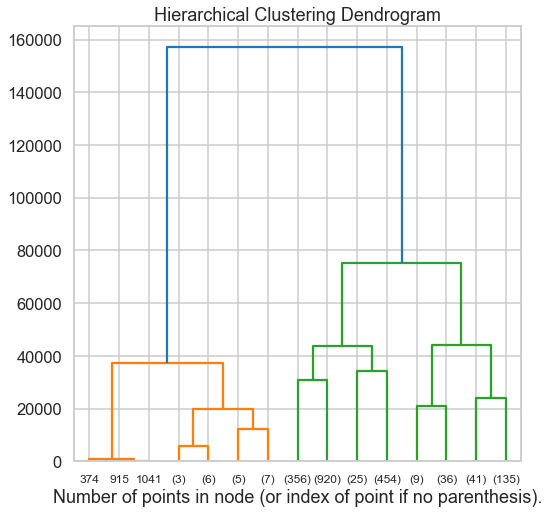

In [218]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

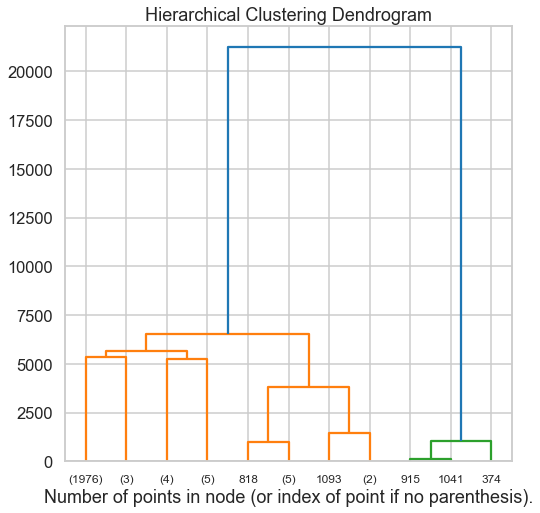

In [221]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

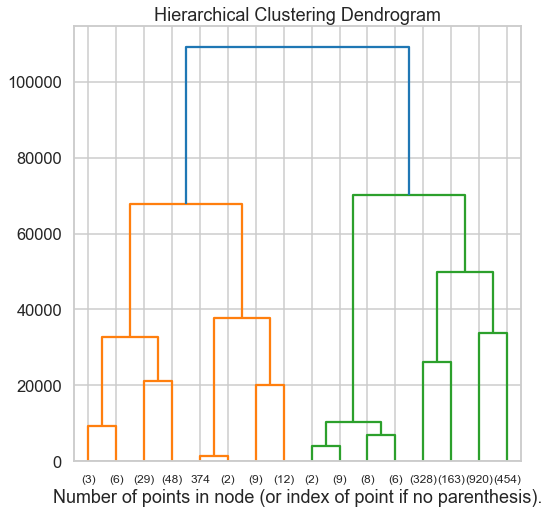

In [222]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

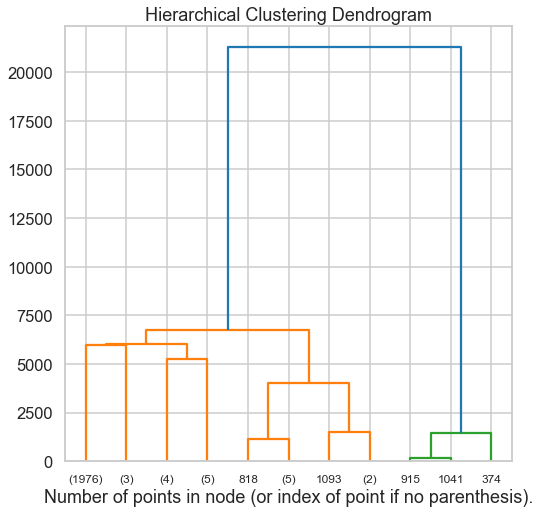

In [223]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='single')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

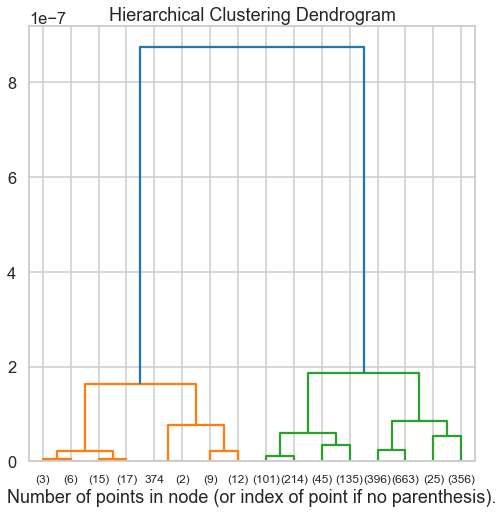

In [224]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

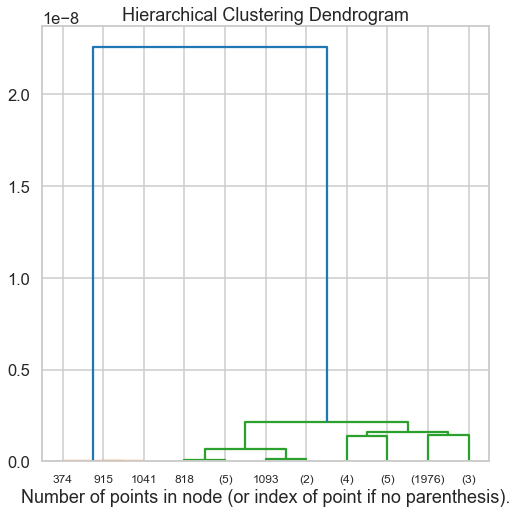

In [225]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='single')
model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# DBScan

In [245]:
silhouette_scores_3= []
eps_1=[]
for eps_db in np.arange(1,3):
        clusters = DBSCAN(eps=eps_db).fit(df)
        silhouette_scores_3.append(silhouette_score(df,clusters.labels_,metric='euclidean'))
        eps_1.append(eps_db)
plt.xlim(1, 3)
plt.ylim(0, 1)
plt.plot(eps_1,silhouette_scores_3)
plt.scatter(eps_1,silhouette_scores_3)
plt.xlabel('EPS')
plt.ylabel('Silhouette Score');

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [244]:
silhouette_scores_4= []
min_samples_1=[]
for min_samples_db in range(5,25,1):
        clusters = DBSCAN(min_samples=min_samples_db).fit(df)
        silhouette_scores_4.append(silhouette_score(df,clusters.labels_,metric='euclidean'))
        #silhouette_scores.append(silhouette_score(Multi_blob_Data,db.labels_,metric='euclidean'))
        min_samples_1.append(min_samples_db)
plt.plot(min_samples_1,silhouette_scores_4)
plt.scatter(min_samples_1,silhouette_scores_4)
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score');

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)